## **Morphological Transformations**


**Some Tyeps**
- Dilation
- Erosion
- MORPH_OPEN
- MORPH_CLOSE
- MORPH_GRADIENT

#### **Function for Display Images and Titles in a Dynamic Grid Layout**


In [4]:
import matplotlib.pyplot as plt

plt.style.use("grayscale")


def display_images(
    images: list, titles: list = None, rows=1, figsize=None, cmap="gray"
):
    size = len(images)
    cols = (size + rows - 1) // rows

    plt.figure(figsize=figsize)
    for i in range(size):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i])
        plt.set_cmap(cmap)
        plt.axis("off")
        if titles:
            plt.title(titles[i])

    plt.tight_layout()
    plt.show()

#### **Image and Mask**


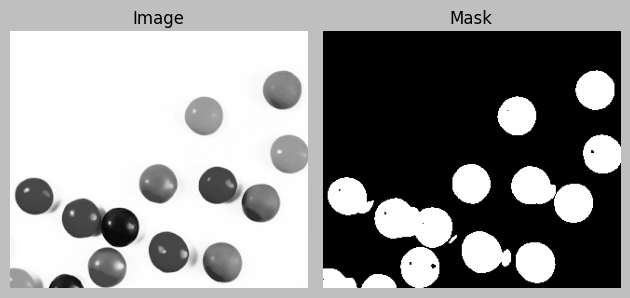

In [5]:
import cv2
import numpy as np

image = cv2.imread("../Data/Images/smarties.png", 0)
mask = cv2.threshold(image, 220, 255, cv2.THRESH_BINARY_INV)[-1]
kernel = np.ones((5, 5), np.uint8)

images = [image, mask]
titles = ["Image", "Mask"]

display_images(images, titles)

---


#### **Dilation**


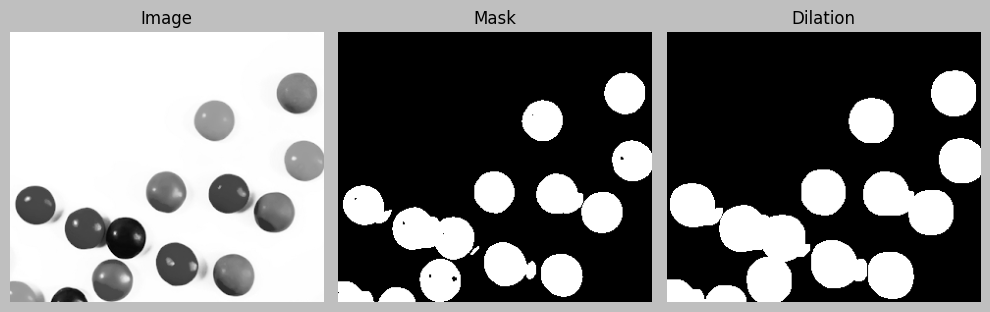

In [6]:
dilation = cv2.dilate(mask, kernel, iterations=1)
display_images(images + [dilation], titles + ["Dilation"], figsize=(10, 5))

---


#### **Erosion**


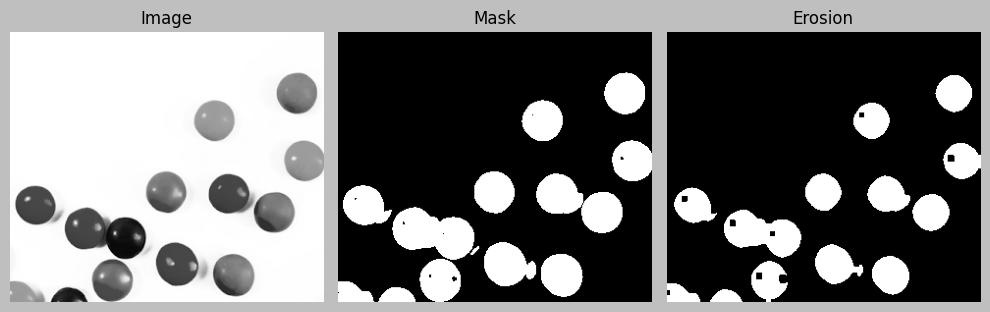

In [7]:
erosion = cv2.erode(mask, kernel, iterations=1)
display_images(images + [erosion], titles + ["Erosion"], figsize=(10, 5))

---


#### **MORPH_OPEN**

- **MORPH_OPEN** = `Erosion` Followed By `Dilation`


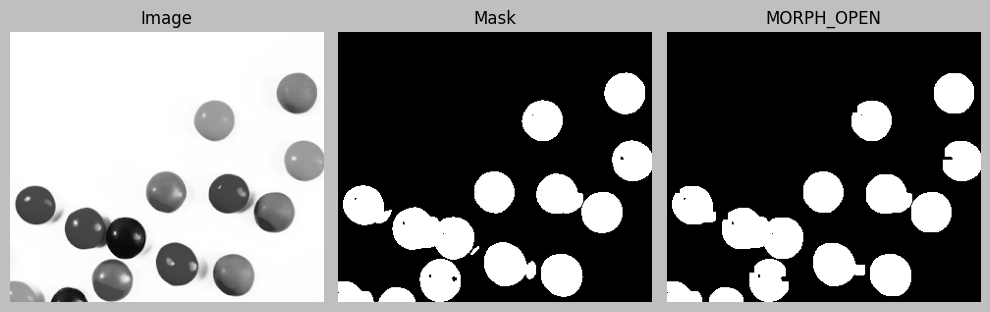

In [8]:
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
display_images(images + [opening], titles + ["MORPH_OPEN"], figsize=(10, 5))

`Erosion` Followed By `Dilation`


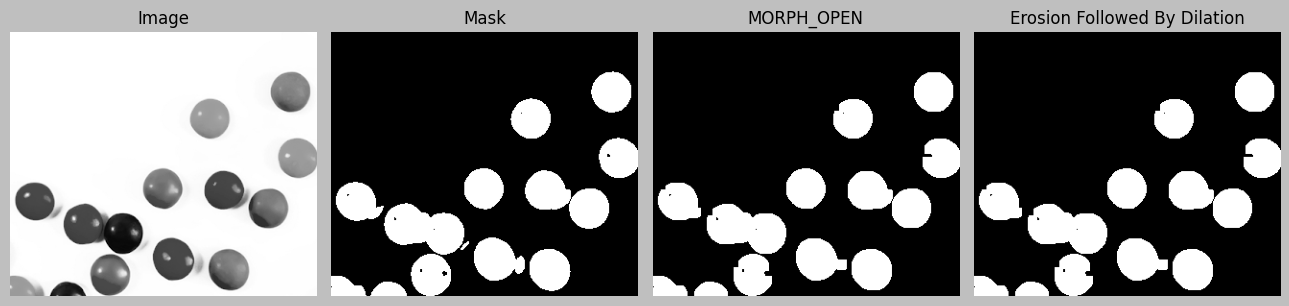

In [9]:
opening_v2 = cv2.erode(mask, kernel, iterations=2)
opening_v2 = cv2.dilate(opening_v2, kernel, iterations=2)

display_images(
    images + [opening, opening_v2],
    titles + ["MORPH_OPEN", "Erosion Followed By Dilation"],
    figsize=(13, 5),
)

---


#### **MORPH_CLOSE**

- **MORPH_CLOSE** = `Dilation` Followed By `Erosion`


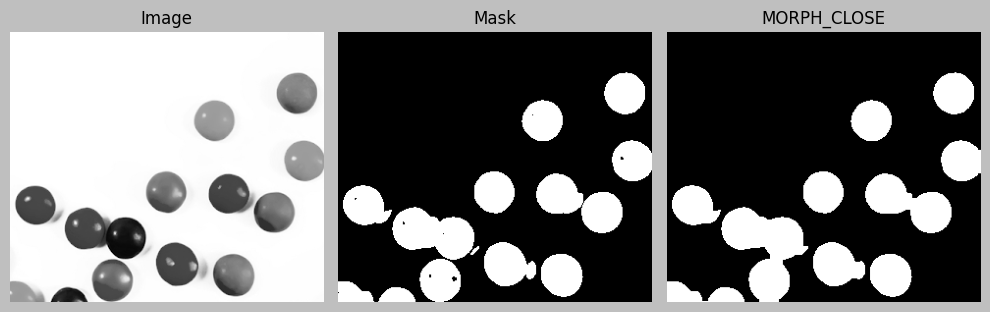

In [10]:
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=1)
display_images(images + [closing], titles + ["MORPH_CLOSE"], figsize=(10, 5))

`Dilation` Followed By `Erosion`


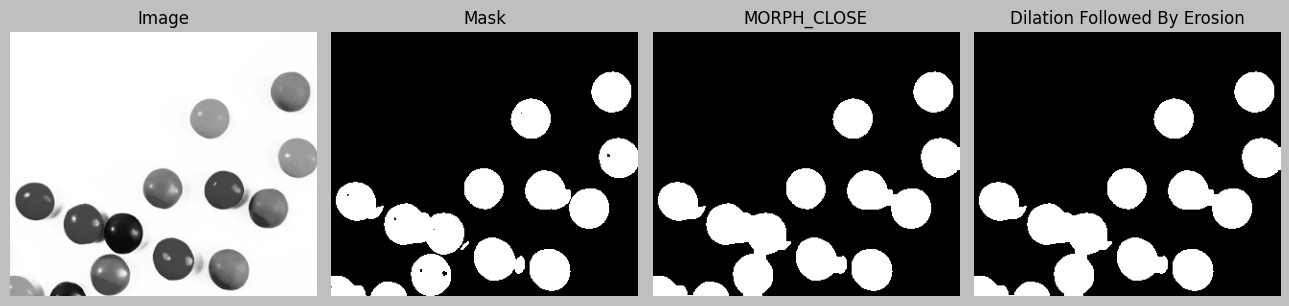

In [11]:
closing_v2 = cv2.dilate(mask, kernel, iterations=1)
closing_v2 = cv2.erode(closing_v2, kernel, iterations=1)
display_images(
    images + [closing, closing_v2],
    titles + ["MORPH_CLOSE", "Dilation Followed By Erosion"],
    figsize=(13, 5),
)

---


#### **MORPH_GRADIENT**

- Difference Between `Dilation` and `Erosion`
- `MORPH_GRADIENT = Dilation - Erosion`


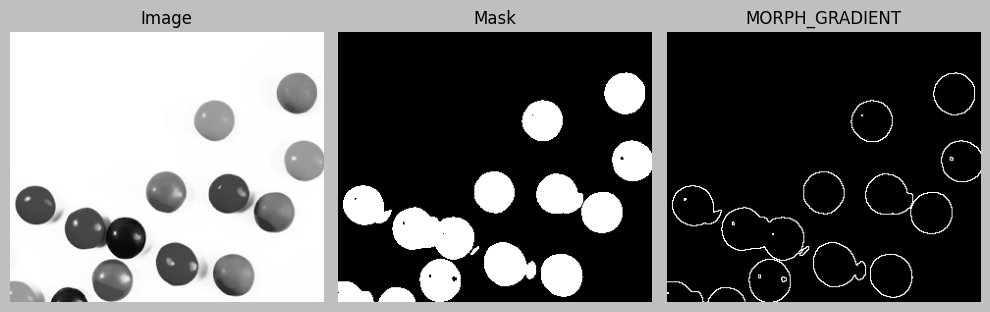

In [12]:
gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel=np.ones((2, 2), np.uint8))
display_images(images + [gradient], titles + ["MORPH_GRADIENT"], figsize=(10, 5))

Difference Between `Dilation` and `Erosion`


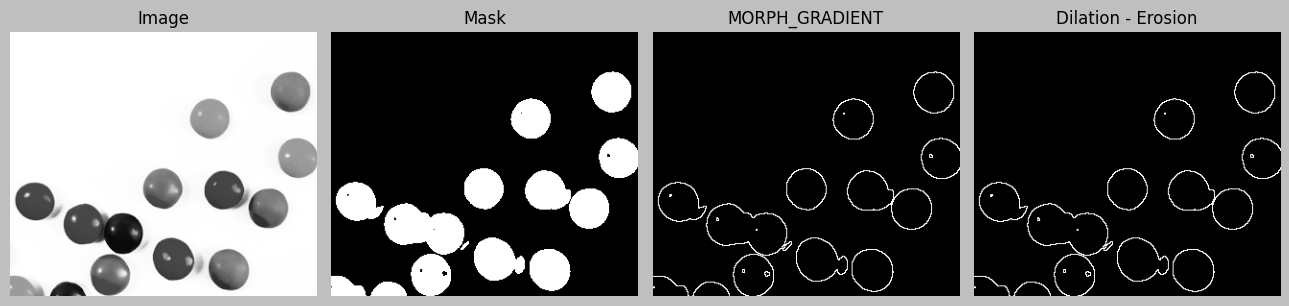

In [13]:
dilation = cv2.dilate(mask, kernel=np.ones((2, 2), np.uint8))
erosion = cv2.erode(mask, kernel=np.ones((2, 2), np.uint8))
gradient_v2 = dilation - erosion

display_images(
    images + [gradient, gradient_v2],
    titles + ["MORPH_GRADIENT", "Dilation - Erosion"],
    figsize=(13, 5),
)

---


#### **Morphological Transformations**


In [14]:
all_images = [image, mask, dilation, erosion, opening, closing, gradient]
all_titles = [
    "Image",
    "Mask",
    "Dilation",
    "Erosion",
    "MORPH_OPEN",
    "MORPH_CLOSE",
    "MORPH_GRADIENT",
]

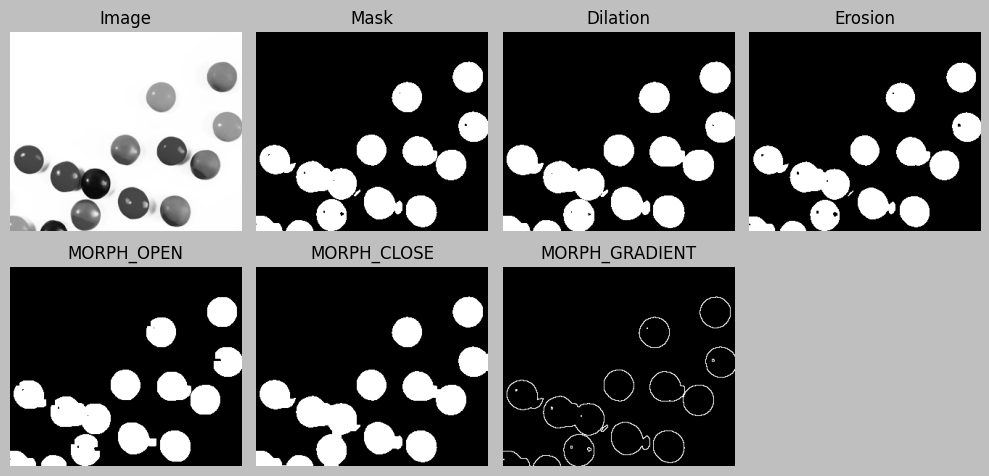

In [20]:
display_images(all_images, all_titles, figsize=(10, 5),rows=2)